# 4. Technical Analysis

In [130]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

#customizing Matplotlib style
plt.style.use("seaborn")
plt.rcParams["figure.figsize"]=[14,8]

[*********************100%%**********************]  1 of 1 completed


<Axes: title={'center': 'INTC stock in from 2019 to 2024'}, xlabel='Date'>

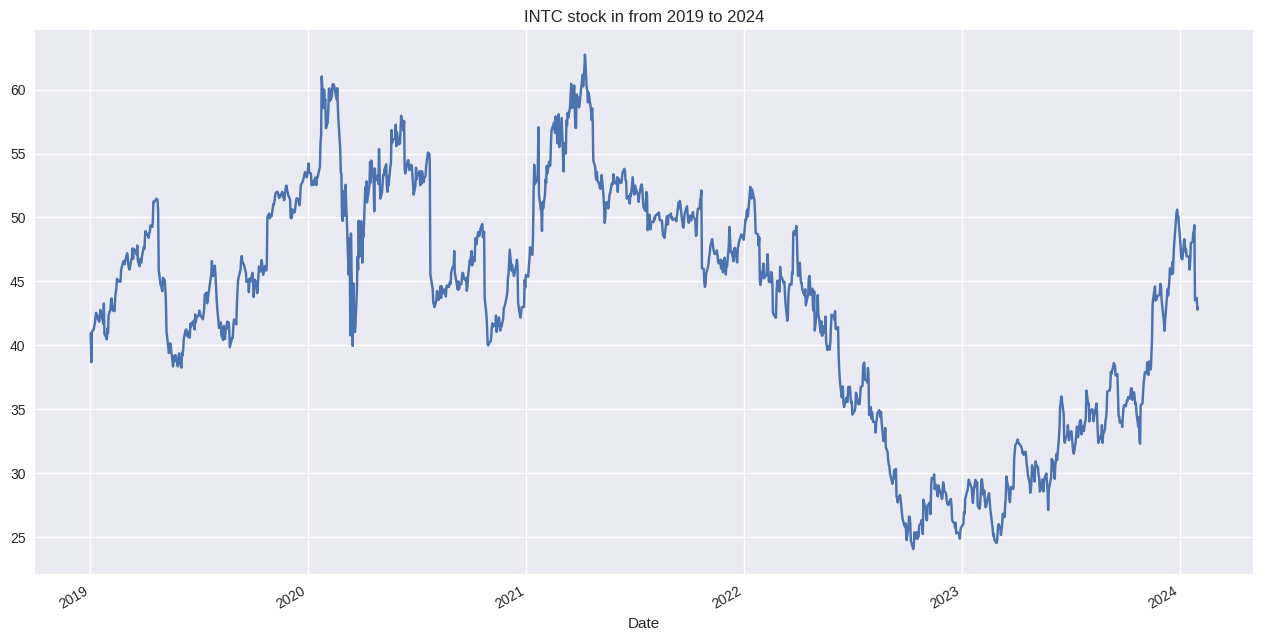

In [131]:
df_INTC=yf.download("INTC",start="2019-01-01",
              end="2024-02-01")
df_INTC["Adj Close"].plot(title="INTC stock in from 2019 to 2024")

In [132]:

!pip install ta


In [133]:
from ta.volatility import BollingerBands

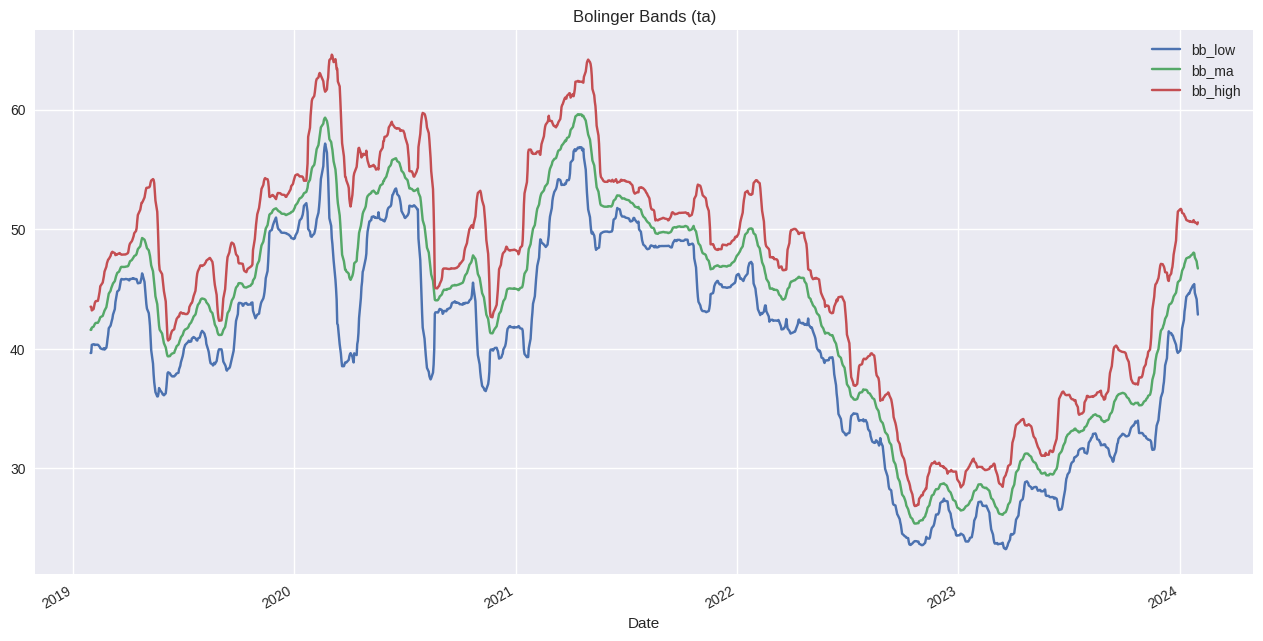

In [135]:
#instantiate the indicator
ta_bbands=BollingerBands(close=df_INTC["Adj Close"],
                                      window=20,
                                      window_dev=2)
#copy as we will be adding to it temporarily
ta_df=df_MCD.copy()

#add Bollinger Bands
ta_df["bb_ma"]=ta_bbands.bollinger_mavg()
ta_df["bb_high"]=ta_bbands.bollinger_hband()
ta_df["bb_low"]=ta_bbands.bollinger_lband()

ta_df[["bb_low","bb_ma","bb_high"]].plot(title="Bolinger Bands (ta)");

# 5. Stock Signals

In [136]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader.data as web
import yfinance as yf

### 5.1 Simple Moving Average on INTC stock from January 1, 2021 to April 30, 2022

In [137]:
myticker ='INTC'
mydata = pd.DataFrame()
mydata[myticker] = yf.download(myticker, start="2019-01-01", end="2024-02-01")['Adj Close']
mydata.columns = {'Close Price'}
mydata.head(10)

[*********************100%%**********************]  1 of 1 completed


,Close Price
Date,
2019-01-02,40.940693
2019-01-03,38.688442
2019-01-04,41.062439
2019-01-07,41.253742
2019-01-08,41.514633
2019-01-09,41.749413
2019-01-10,42.227703
2019-01-11,42.549450
2019-01-14,42.045078


In [138]:
mydata.tail()

,Close Price
Date,
2024-01-25,49.405186
2024-01-26,43.522430
2024-01-29,43.711872
2024-01-30,42.794559
2024-01-31,42.954098


In [139]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1279 entries, 2019-01-02 to 2024-01-31
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Close Price  1279 non-null   float64
dtypes: float64(1)
memory usage: 20.0 KB


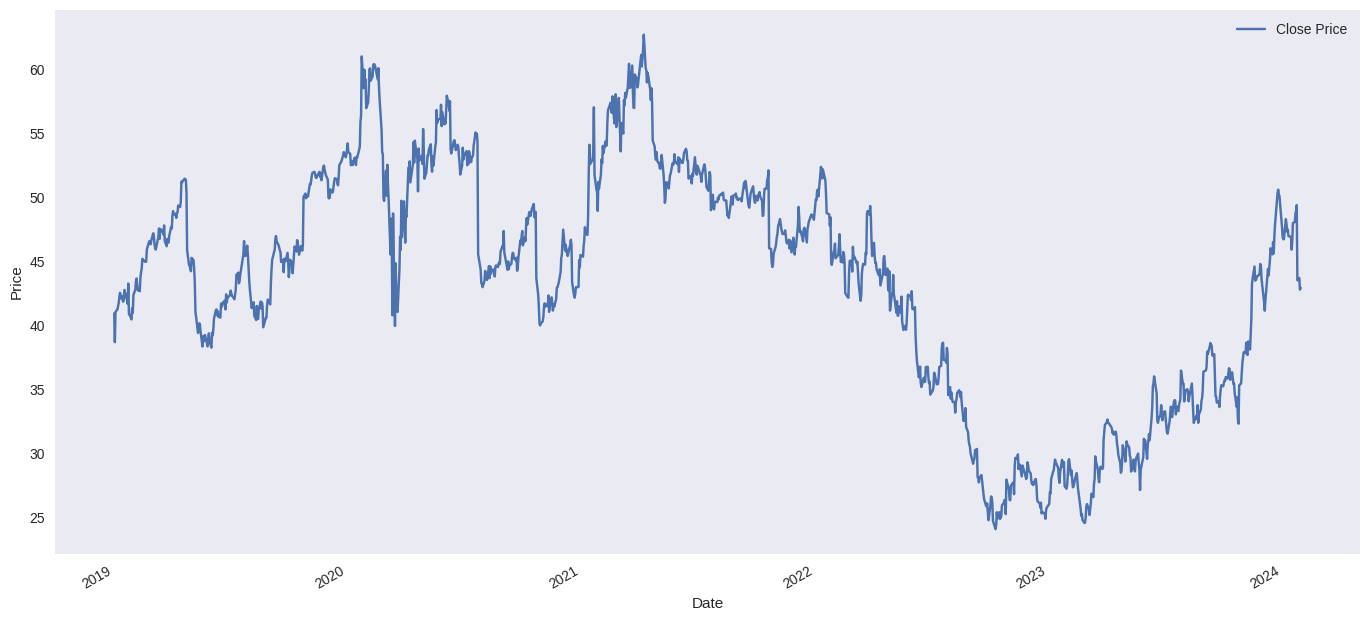

In [140]:
mydata.plot(figsize = (15, 8))
plt.grid()
plt.ylabel("Price")
plt.show()

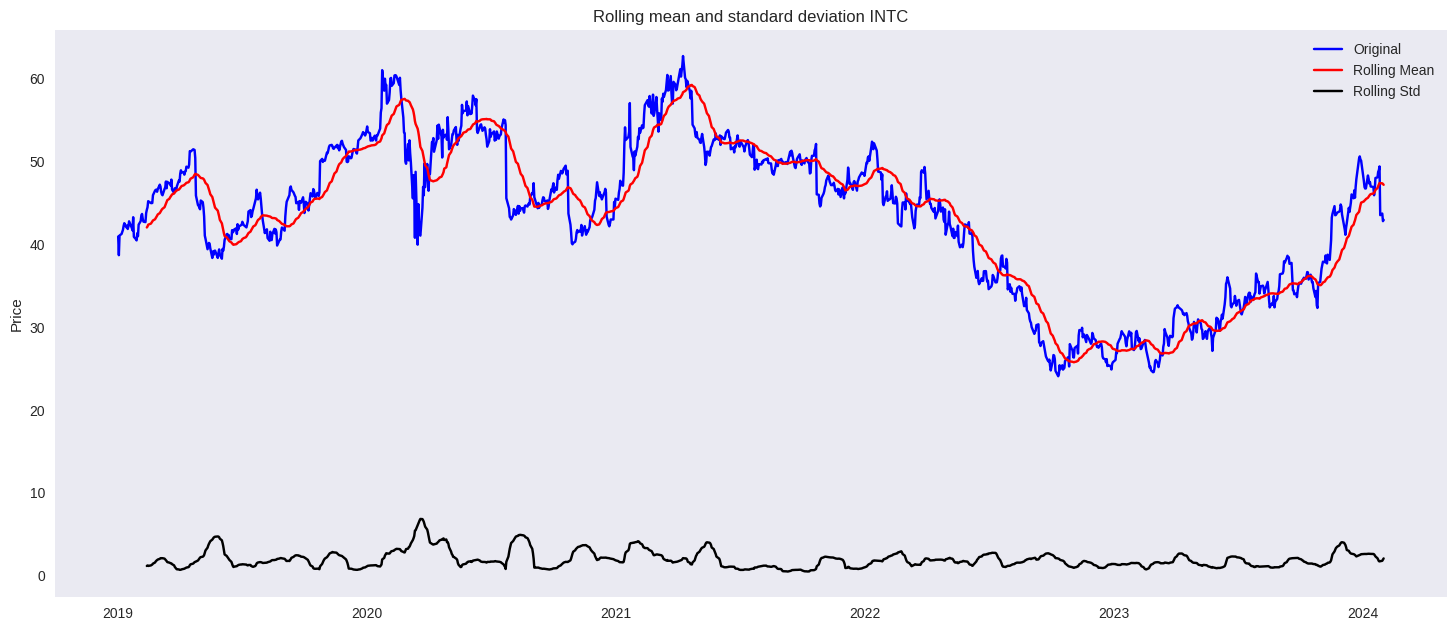

In [141]:
rolling_mean = mydata['Close Price'].rolling(30).mean()
rolling_std = mydata['Close Price'].rolling(30).std()

plt.figure(figsize = (16, 7))
fig=plt.figure(1)

orig = plt.plot(mydata['Close Price'],color='blue',label='Original')
mean = plt.plot(rolling_mean,color='red',label='Rolling Mean')
std = plt.plot(rolling_std,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling mean and standard deviation ' + myticker)
plt.grid()
plt.ylabel("Price")
plt.show()

In [142]:
# create 30 days simple moving average column
mydata['SMA30'] = mydata['Close Price'].rolling(window = 30, min_periods = 1).mean()
# create 90 days simple moving average column
mydata['SMA90'] = mydata['Close Price'].rolling(window = 90, min_periods = 1).mean()
# display first few rows
mydata.head()

,Close Price,SMA30,SMA90
Date,,,
2019-01-02,40.940693,40.940693,40.940693
2019-01-03,38.688442,39.814568,39.814568
2019-01-04,41.062439,40.230525,40.230525
2019-01-07,41.253742,40.486329,40.486329
2019-01-08,41.514633,40.691990,40.691990


### Trade signals

###### When the short term moving average crosses above the long term moving average, this indicates a buy signal.
###### Contrary, when the short term moving average crosses below the long term moving average, it may be a good moment to sell.

In [143]:
mydata['Signal'] = 0.0
mydata['Signal'] = np.where(mydata['SMA30'] > mydata['SMA90'], 1.0, 0.0)

In [144]:
mydata['Position'] = mydata['Signal'].diff()
# display first few rows
mydata.head()

,Close Price,SMA30,SMA90,Signal,Position
Date,,,,,
2019-01-02,40.940693,40.940693,40.940693,0.0,NaN
2019-01-03,38.688442,39.814568,39.814568,0.0,0.0
2019-01-04,41.062439,40.230525,40.230525,0.0,0.0
2019-01-07,41.253742,40.486329,40.486329,0.0,0.0
2019-01-08,41.514633,40.691990,40.691990,0.0,0.0


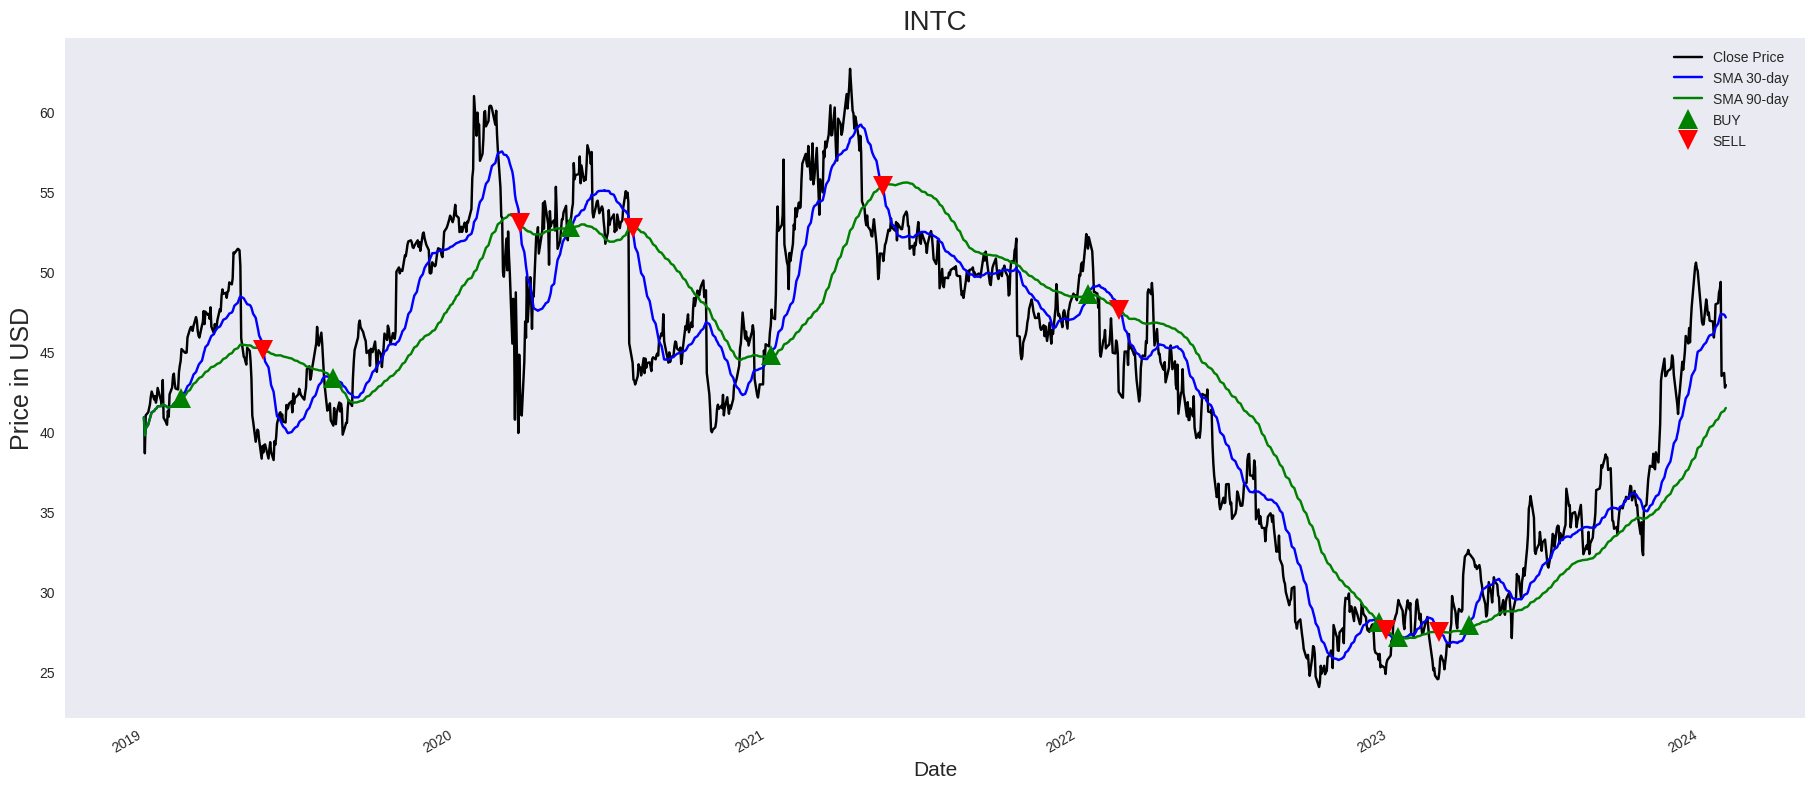

In [145]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages
mydata['Close Price'].plot(color = 'k', label= 'Close Price')
mydata['SMA30'].plot(color = 'b',label = 'SMA 30-day ')
mydata['SMA90'].plot(color = 'g', label = 'SMA 90-day ')
# plot ‘buy’ signals
plt.plot(mydata[mydata['Position'] == 1].index,
         mydata['SMA30'][mydata['Position'] == 1],
         '^', markersize = 15, color = 'g', label = 'BUY')
# plot ‘sell’ signals
plt.plot(mydata[mydata['Position'] == -1].index,
         mydata['SMA90'][mydata['Position'] == -1],
         'v', markersize = 15, color = 'r', label = 'SELL')
plt.ylabel('Price in USD', fontsize = 18 )
plt.xlabel('Date', fontsize = 15 )
plt.title(myticker, fontsize = 20)
plt.legend()
plt.grid()
plt.show()



In [146]:
df_position = mydata[(mydata['Position'] == 1) | (mydata['Position'] == -1)]
df_position['Position'] = df_position['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df_position, headers = 'keys', tablefmt = 'psql'))

+---------------------+---------------+---------+---------+----------+------------+
| Date                |   Close Price |   SMA30 |   SMA90 |   Signal | Position   |
|---------------------+---------------+---------+---------+----------+------------|
| 2019-02-14 00:00:00 |       44.4644 | 42.1537 | 42.1145 |        1 | Buy        |
| 2019-05-22 00:00:00 |       38.7407 | 45.0686 | 45.1338 |        0 | Sell       |
| 2019-08-12 00:00:00 |       40.4205 | 43.3675 | 43.3397 |        1 | Buy        |
| 2020-03-18 00:00:00 |       42.6434 | 53.0226 | 53.0813 |        0 | Sell       |
| 2020-05-15 00:00:00 |       52.4952 | 52.8128 | 52.7149 |        1 | Buy        |
| 2020-07-28 00:00:00 |       44.3525 | 52.6808 | 52.788  |        0 | Sell       |
| 2021-01-06 00:00:00 |       46.6776 | 44.8281 | 44.7918 |        1 | Buy        |
| 2021-05-18 00:00:00 |       50.7084 | 55.1784 | 55.3806 |        0 | Sell       |
| 2022-01-13 00:00:00 |       51.4865 | 48.6639 | 48.5655 |        1 | Buy  

### 5.2 Exponential Moving Average on INTC stock from January 1, 2021 through April 30, 2022

Create new columns in our dataframe for both the long(i.e. 90 days) and short (i.e 30 days) Exponetial moving averages (EMAs)

In [147]:
myticker ='INTC'
mydata = pd.DataFrame()
mydata[myticker] = yf.download(myticker, start="2021-01-01", end="2024-02-1")['Adj Close']
mydata.columns = {'Close Price'}
mydata.head(10)

[*********************100%%**********************]  1 of 1 completed


,Close Price
Date,
2021-01-04,45.371323
2021-01-05,46.229969
2021-01-06,46.677567
2021-01-07,47.673233
2021-01-08,47.179970
2021-01-11,47.079487
2021-01-12,48.632366
2021-01-13,52.021282
2021-01-14,54.122227


In [148]:
mydata['EMA30'] = mydata['Close Price'].ewm(span = 30, adjust = False).mean()

In [149]:
mydata['EMA90'] = mydata['Close Price'].ewm(span = 90, adjust = False).mean()

In [150]:
mydata['Signal_Exponential'] = 0.0
mydata['Signal_Exponential'] = np.where(mydata['EMA30'] > mydata['EMA90'], 1.0, 0.0)

In [151]:
mydata['Position_Exponential'] = mydata['Signal_Exponential'].diff()

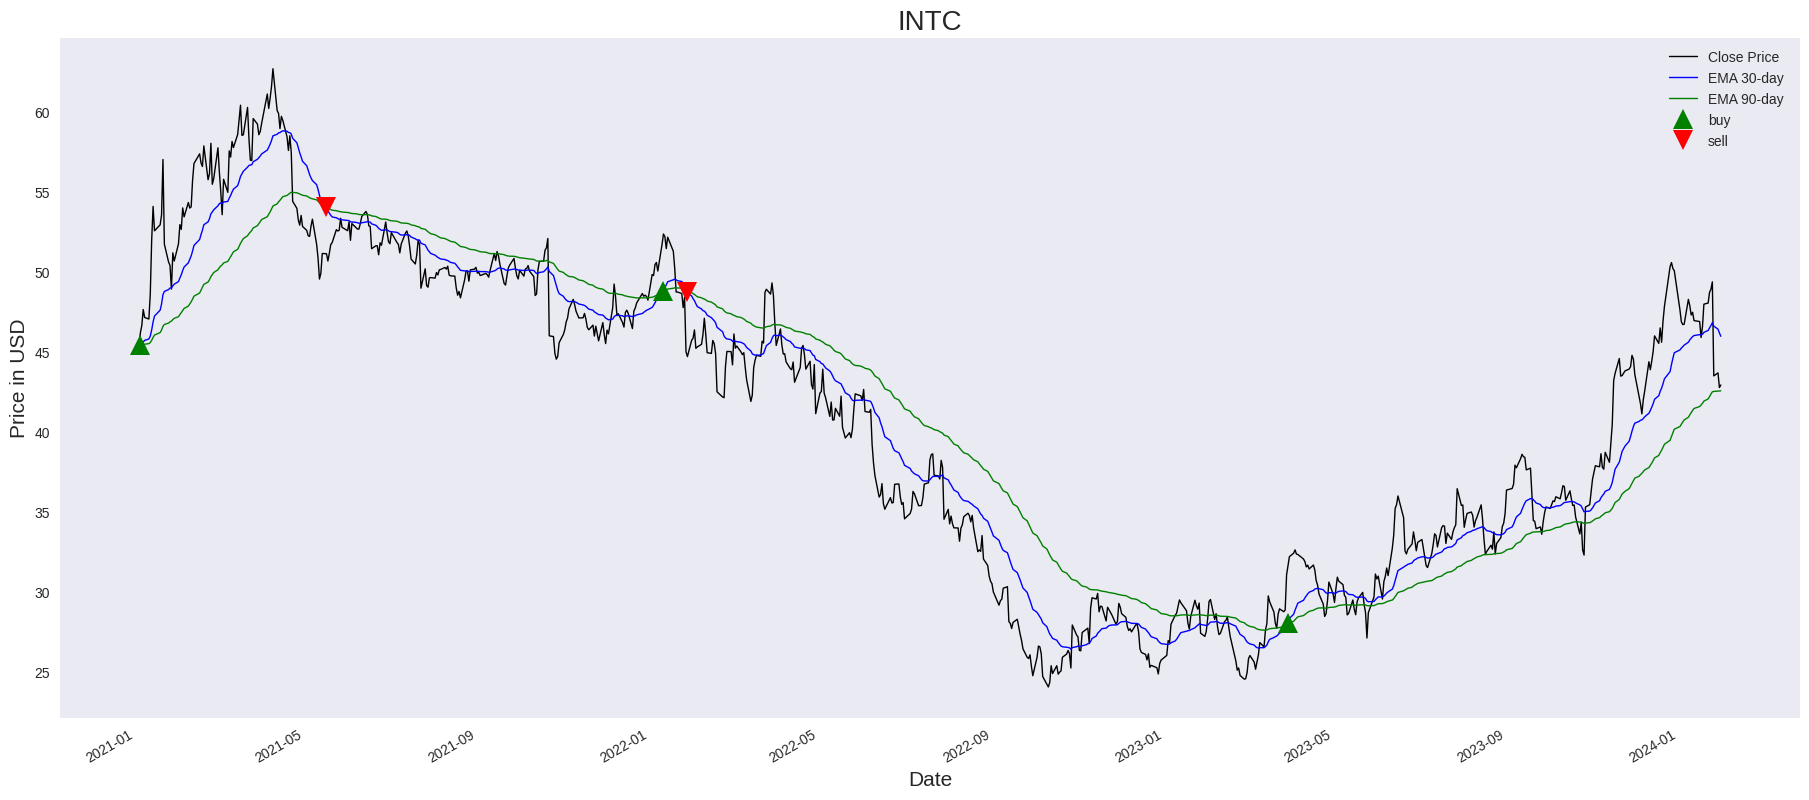

In [152]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages
mydata['Close Price'].plot(color = 'k', lw = 1, label = 'Close Price')
mydata['EMA30'].plot(color = 'b', lw = 1, label = 'EMA 30-day ')
mydata['EMA90'].plot(color = 'g', lw = 1, label = 'EMA 90-day ')
# plot ‘buy’ and 'sell' signals
plt.plot(mydata[mydata['Position_Exponential'] == 1].index,
         mydata['EMA30'][mydata['Position_Exponential'] == 1],
         '^', markersize = 15, color = 'g', label = 'buy')
plt.plot(mydata[mydata['Position_Exponential'] == -1].index,
         mydata['EMA90'][mydata['Position_Exponential'] == -1],
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in USD', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title(myticker , fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [153]:
df_position_1 = mydata[(mydata['Position_Exponential'] == 1) | (mydata['Position_Exponential'] == -1)]
df_position_1['Position'] = df_position_1['Position_Exponential'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df_position_1, headers = 'keys', tablefmt = 'psql'))

+---------------------+---------------+---------+---------+----------------------+------------------------+------------+
| Date                |   Close Price |   EMA30 |   EMA90 |   Signal_Exponential |   Position_Exponential | Position   |
|---------------------+---------------+---------+---------+----------------------+------------------------+------------|
| 2021-01-05 00:00:00 |       46.23   | 45.4267 | 45.3902 |                    1 |                      1 | Buy        |
| 2021-05-17 00:00:00 |       51.1614 | 54.0928 | 54.1158 |                    0 |                     -1 | Sell       |
| 2022-01-11 00:00:00 |       52.3955 | 48.8421 | 48.7456 |                    1 |                      1 | Buy        |
| 2022-01-28 00:00:00 |       44.7297 | 48.716  | 48.7971 |                    0 |                     -1 | Sell       |
| 2023-03-30 00:00:00 |       31.6474 | 28.088  | 27.9917 |                    1 |                      1 | Buy        |
+---------------------+---------

In [154]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from prophet import Prophet
plt.style.use('fivethirtyeight')

# 6. Forecasting Stock: INTC

In [155]:
!pip install yfinance


In [156]:
import yfinance as yf

# Download historical data for INTC from Yahoo Finance
df = yf.download("INTC", start="2019-01-01", end="2024-02-01")

# Display the first few rows of the data
print(data.head())

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2020-01-02  60.240002  60.970001  60.220001  60.840000  54.226273  18056000
2020-01-03  59.810001  60.700001  59.810001  60.099998  53.566700  15293900
2020-01-06  59.590000  60.200001  59.330002  59.930000  53.415188  17755200
2020-01-07  59.779999  59.799999  58.889999  58.930000  52.523907  21876100
2020-01-08  58.889999  59.320000  58.520000  58.970001  52.559551  23133500


In [157]:
# add two new columns ds and Y (closing price(we will do forecasting on this price) for y and date for ds)
df=df.reset_index()
df[['ds','y']]=df[['Date','Close']]

In [158]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,ds,y
0,2019-01-02,45.959999,47.470001,45.770000,47.080002,40.940693,18774600,2019-01-02,47.080002
1,2019-01-03,46.150002,46.279999,44.389999,44.490002,38.688442,32267300,2019-01-03,44.490002
2,2019-01-04,45.840000,47.570000,45.540001,47.220001,41.062439,35447300,2019-01-04,47.220001
3,2019-01-07,47.099998,48.000000,46.750000,47.439999,41.253742,22736800,2019-01-07,47.439999
4,2019-01-08,47.799999,48.029999,46.779999,47.740002,41.514633,22749200,2019-01-08,47.740002
...,...,...,...,...,...,...,...,...,...
1274,2024-01-25,50.000000,50.299999,48.970001,49.549999,49.405186,84845100,2024-01-25,49.549999
1275,2024-01-26,44.180000,45.410000,43.349998,43.650002,43.522430,127665300,2024-01-26,43.650002
1276,2024-01-29,43.709999,43.990002,42.810001,43.840000,43.711872,51790900,2024-01-29,43.840000
1277,2024-01-30,43.669998,43.820000,42.889999,42.919998,42.794559,47958800,2024-01-30,42.919998


In [159]:
model=Prophet()

In [160]:
#drop the columns
prophet_df=df.drop(['Date','High','Low','Open','Close','Volume','Adj Close'],axis=1)

In [161]:
prophet_df

,ds,y
0,2019-01-02,47.080002
1,2019-01-03,44.490002
2,2019-01-04,47.220001
3,2019-01-07,47.439999
4,2019-01-08,47.740002
...,...,...
1274,2024-01-25,49.549999
1275,2024-01-26,43.650002
1276,2024-01-29,43.840000
1277,2024-01-30,42.919998


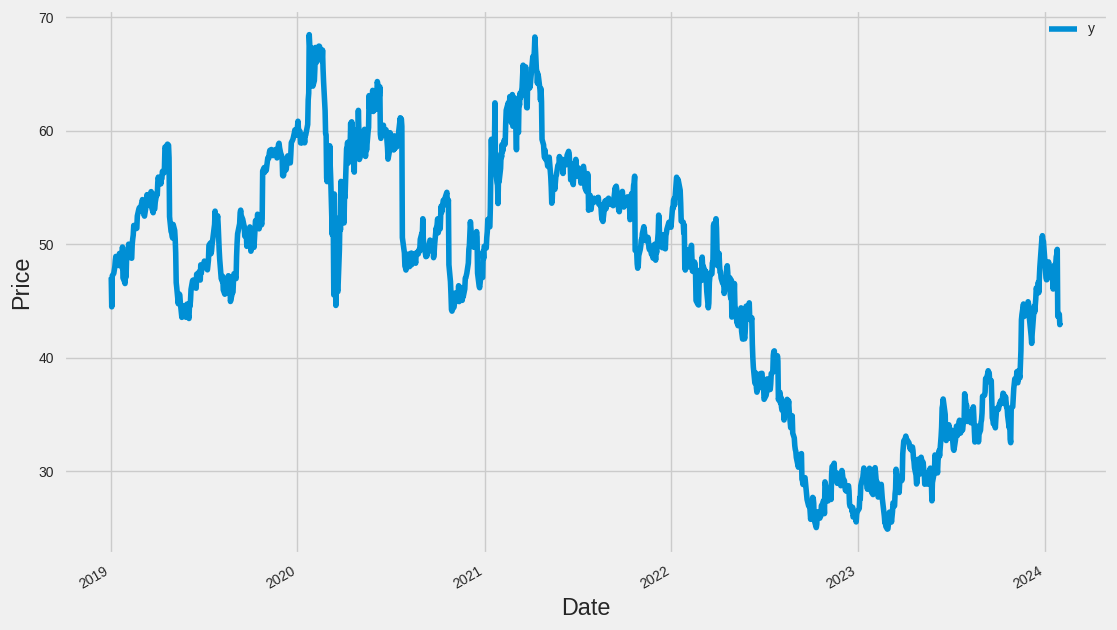

In [162]:
ax=prophet_df.set_index('ds').plot(figsize=(12,8))
ax.set_ylabel('Price')
ax.set_xlabel('Date')
plt.show()

In [163]:
model.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgy0n580_/tp1m7vcq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgy0n580_/rhmn2_yy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19990', 'data', 'file=/tmp/tmpgy0n580_/tp1m7vcq.json', 'init=/tmp/tmpgy0n580_/rhmn2_yy.json', 'output', 'file=/tmp/tmpgy0n580_/prophet_modelm53galsr/prophet_model-20240415195636.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:56:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:56:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [164]:
future=model.make_future_dataframe(periods=365)

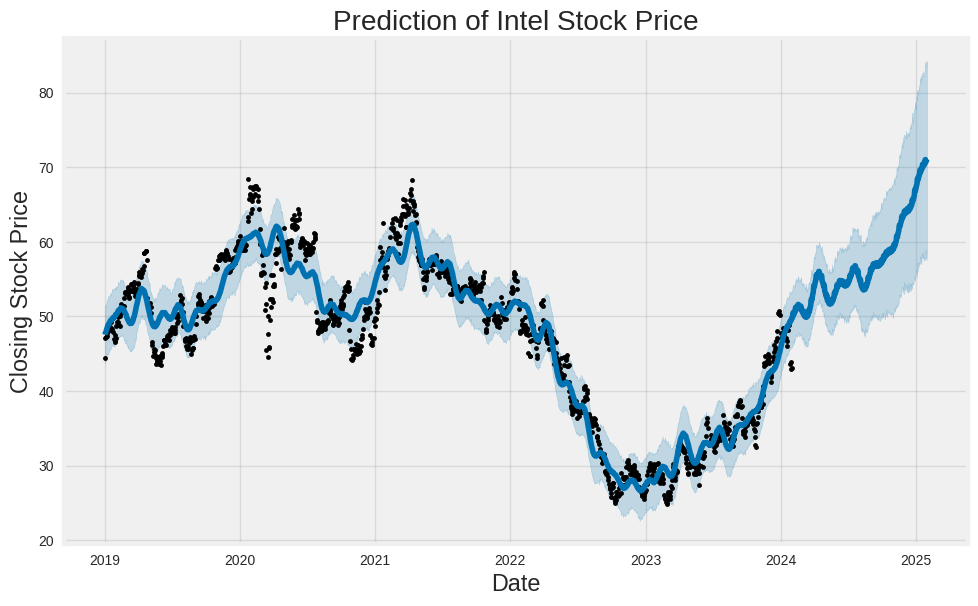

,ds,yhat,yhat_lower,yhat_upper
1639,2025-01-26,71.026310,58.940669,84.159529
1640,2025-01-27,70.681161,58.083143,83.446511
1641,2025-01-28,70.803699,57.772120,83.636760
1642,2025-01-29,70.940047,57.569280,83.979347
1643,2025-01-30,71.079499,58.226280,84.239989


In [165]:
predictions=model.predict(future)
model.plot(predictions)
plt.title("Prediction of Intel Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.show()
predictions[['ds','yhat','yhat_lower','yhat_upper']].tail()

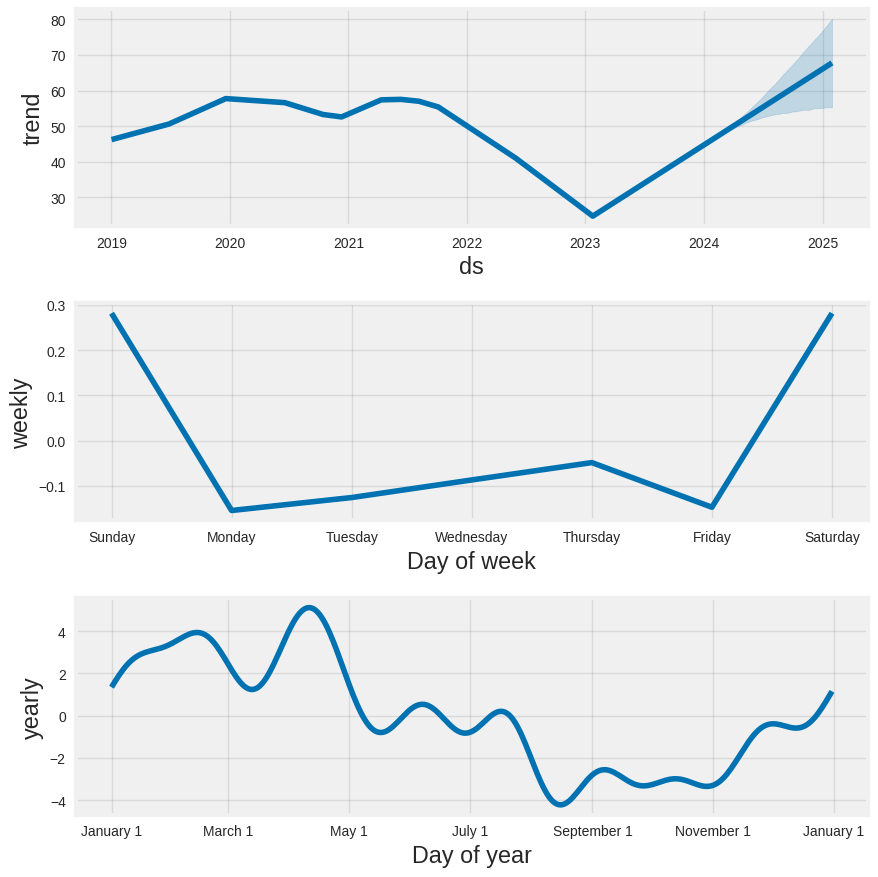

In [166]:
model.plot_components(predictions)
plt.show()